# <font color='red' style='font-size: 30px;'>Introdução</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

https://docs.python.org/3/library/pickle.html

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

## Importando *LinearRegression*, *metrics* e *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [143]:
import warnings

warnings.filterwarnings('ignore')

# O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto terá um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>Temperatura Media (C)</b> - Temperatura Média (°C)</li>
    <li><b>Temperatura Minima (C)</b> - Temperatura Mínima (°C)</li>
    <li><b>Temperatura Maxima (C)</b> - Temperatura Máxima (°C)</li>
    <li><b>Precipitacao (mm)</b> - Precipitação (mm)</li>
    <li><b>Final de Semana</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>Consumo de Cerveja (litros)</b> - Consumo de Cerveja (litros)</li>
</ul>

# Leitura dos dados

In [144]:
data = pd.read_csv(r"C:\Users\guilh\Downloads\archive\Consumo_cerveja.csv")


# Informação sobre o Dataset

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


# Limpando dados nulos

In [146]:
data = data.dropna()

# Visualização dos dados

In [147]:
data

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [148]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


# Tamanho do Dataset

In [149]:
data.shape

(365, 7)

# Substituindo as vírgulas por pontos

In [150]:
data = data.replace(',', '.', regex=True)


# Transformando objeto em float

In [151]:
data['Temperatura Media (C)'] = data['Temperatura Media (C)'].astype(float)
data['Temperatura Minima (C)'] = data['Temperatura Minima (C)'].astype(float)
data['Temperatura Maxima (C)'] = data['Temperatura Maxima (C)'].astype(float)
data['Precipitacao (mm)'] = data['Precipitacao (mm)'].astype(float)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

# Estatísticas descritivas

In [152]:
data.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


# Matriz de correlação


In [153]:
data_floats = data.select_dtypes(include=['float64'])
data_floats.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


# <font color='red' style='font-size: 30px;'>Análises Gráficas</font>
<hr style='border: 2px solid red;'>

## Plotando a variável *dependente* (y)


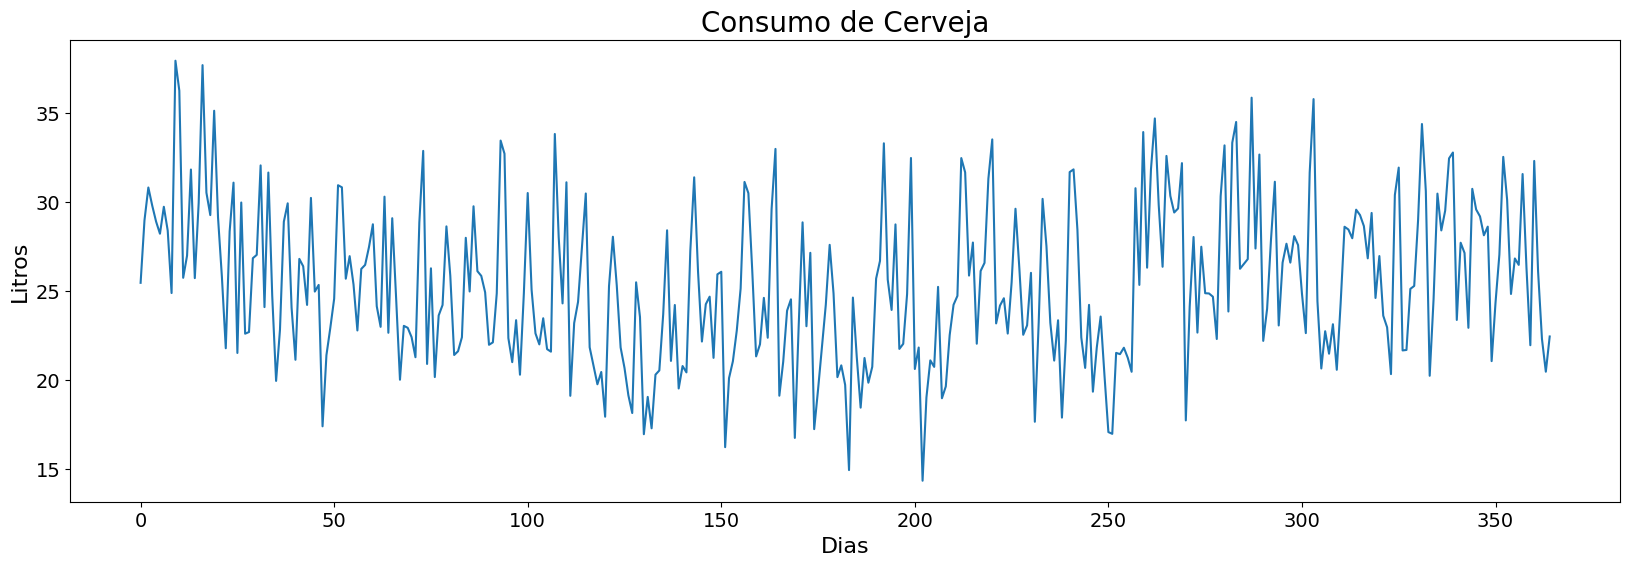

In [154]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Dias', fontsize = 16)
ax = data['Consumo de cerveja (litros)'].plot(fontsize=14)

## Box plot da variável *dependente* (y)

Text(29.999999999999993, 0.5, 'Litros')

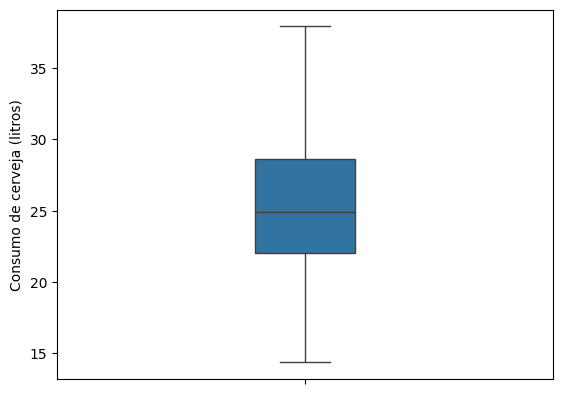

In [155]:
sns.boxplot(data = data['Consumo de cerveja (litros)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0.5, 0, 'Final de Semana')

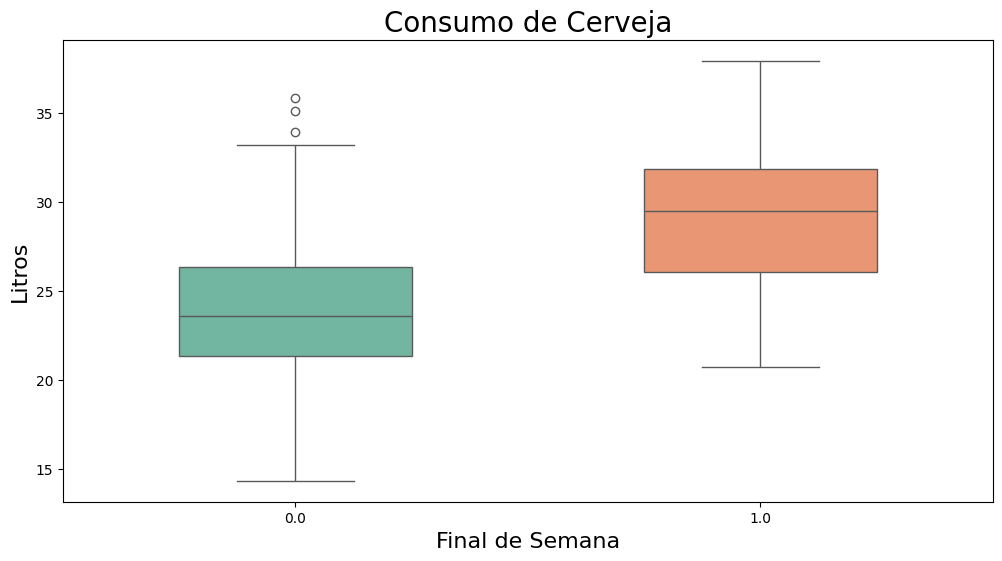

In [156]:
ax = sns.boxplot(y='Consumo de cerveja (litros)', x='Final de Semana', data=data, orient='v', width=0.5, palette='Set2')
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)


# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

<Axes: title={'center': 'Distrubuição de Frequências'}, xlabel='Consumo de cerveja (litros)', ylabel='Consumo de Cerveja(Litros)'>

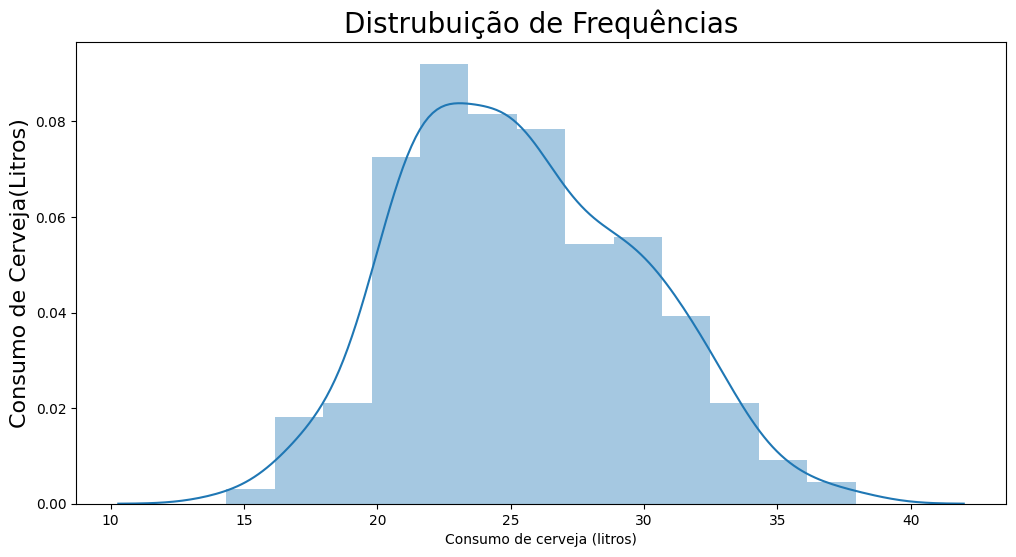

In [157]:
ax = sns.distplot(data['Consumo de cerveja (litros)'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (Pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

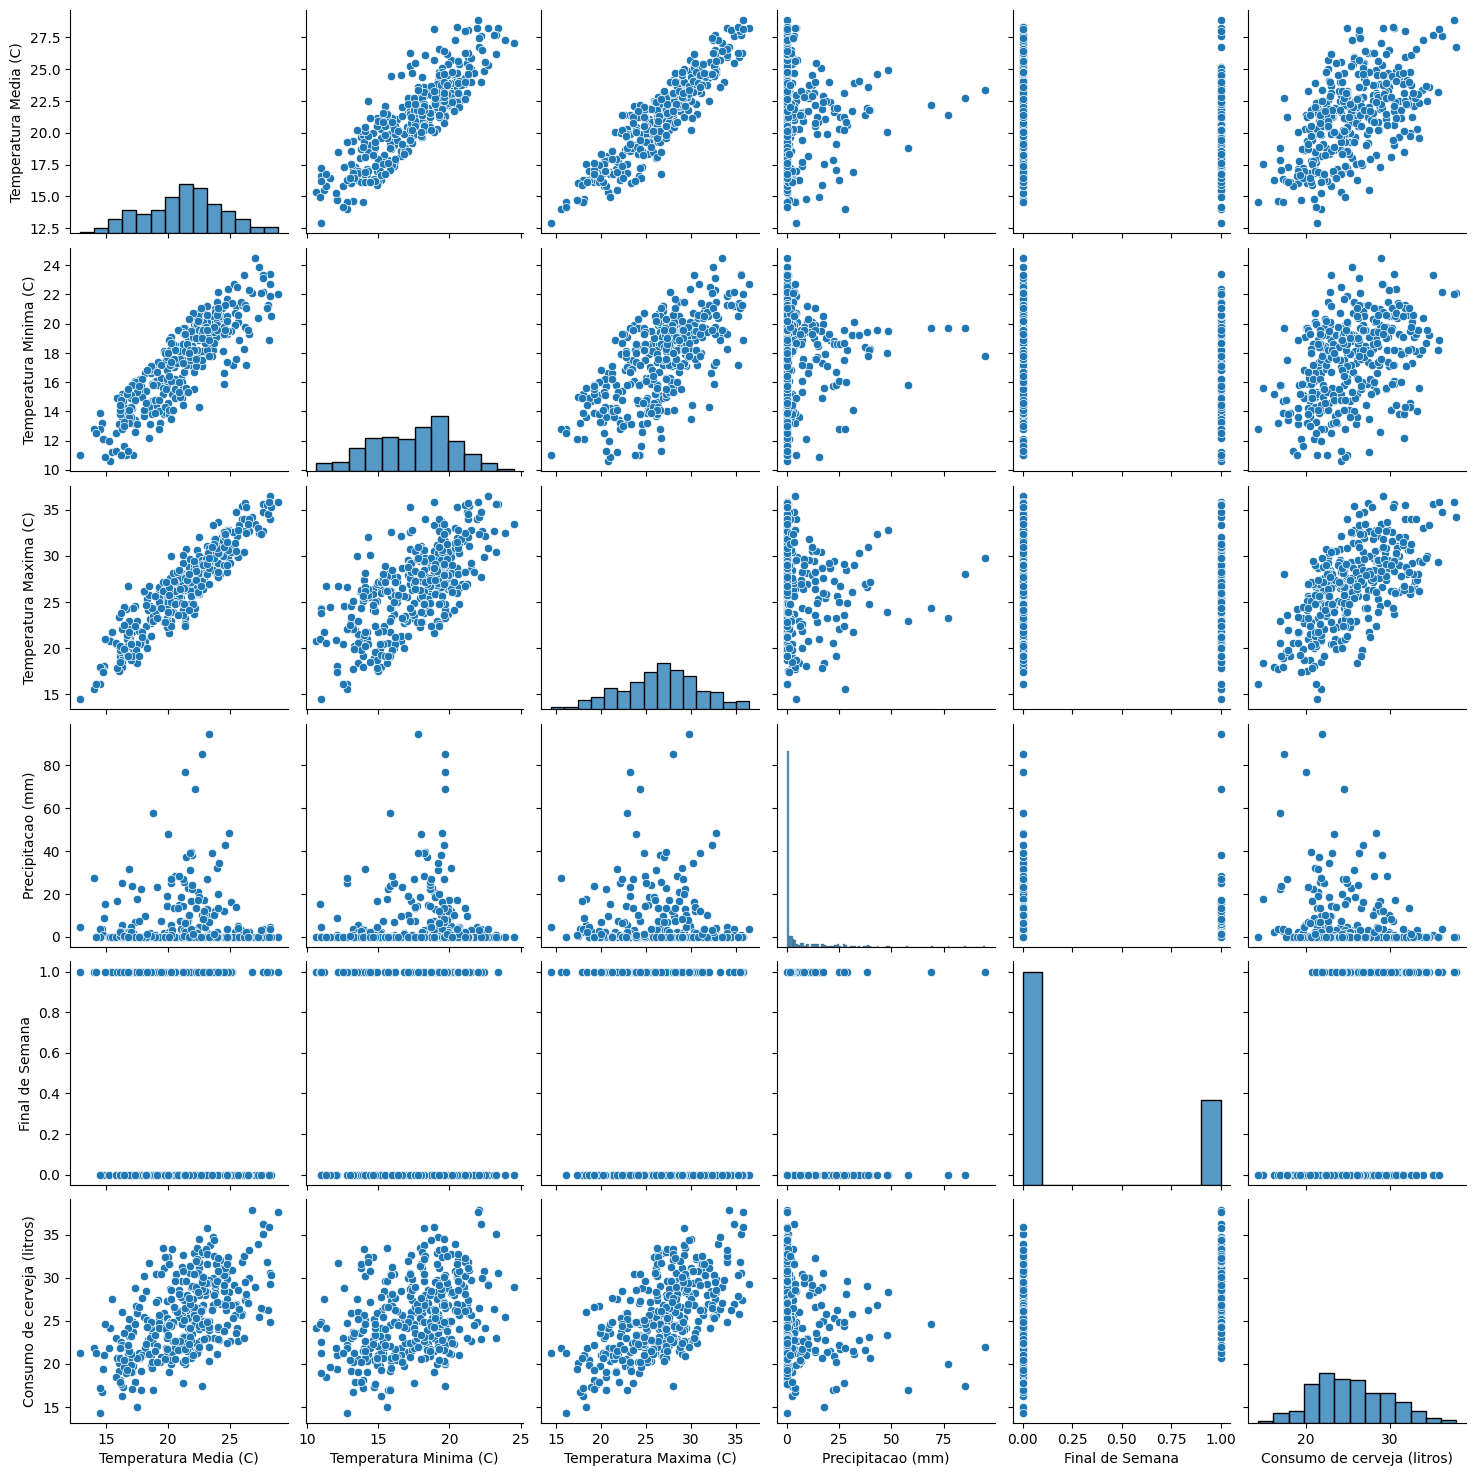

In [158]:
ax = sns.pairplot(data)

## Plotando o pairplot fixando somente uma variável no eixo y

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

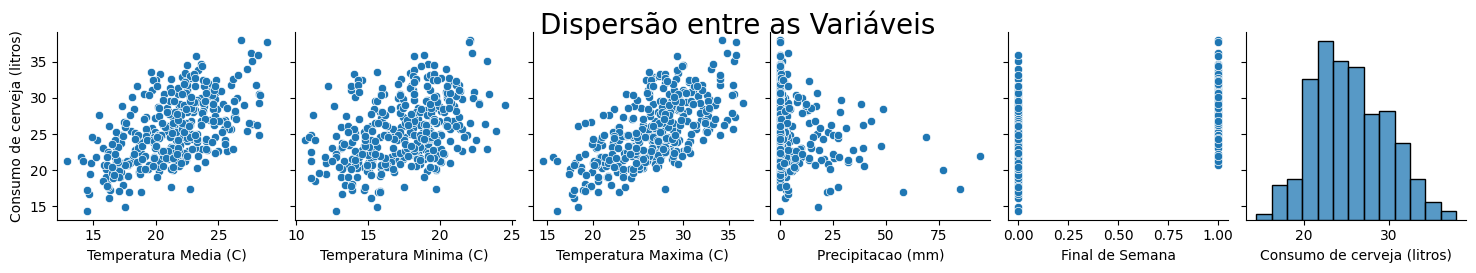

In [159]:
ax = sns.pairplot(data, y_vars='Consumo de cerveja (litros)')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)


# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## Plotando um jointplot com a reta de regressão estimada

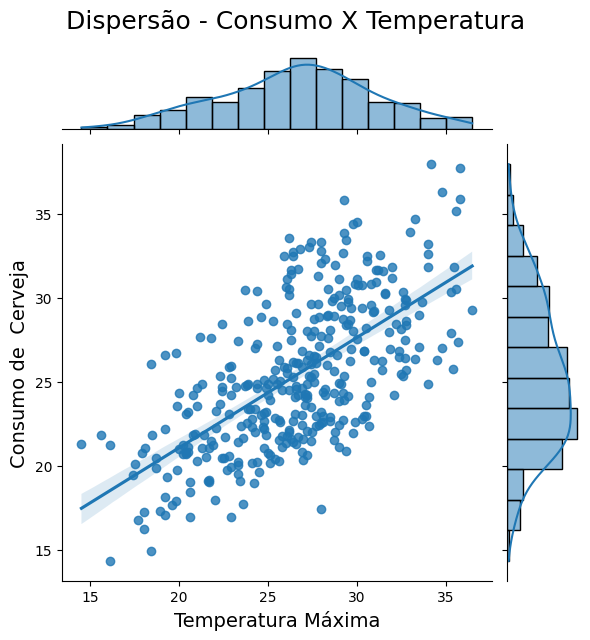

In [160]:
ax = sns.jointplot(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", data=data, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

## Criando DataFrames para armazenar as variáveis e Datasets para treinos e testes

In [161]:
X = data[['Temperatura Maxima (C)','Precipitacao (mm)','Final de Semana']]
y = data['Consumo de cerveja (litros)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [162]:
modelo = LinearRegression()

## Estimando modelo linear utilizando os dados de treino (y_train e X_train)

In [163]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino


In [164]:
score = modelo.score(X_train, y_train)
print('R² = {}'.format(round(score, 2)))


R² = 0.73


## Obtendo o coeficiente de determinação (R²) para as previsões do modelo


In [165]:
y_previsto = modelo.predict(X_test)
r2_score = metrics.r2_score(y_test, y_previsto)

r2_score_arredondado = round(r2_score, 2)

print('R² = {}'.format(r2_score_arredondado))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada


In [166]:
entry = X_test[0:1]
entry

,Temperatura Maxima (C),Precipitacao (mm),Final de Semana
5,30.5,12.2,0.0


## Previsão pontual

In [167]:
a = modelo.predict(entry)[0]
a = a * 1000
a

26094.901775262017

## Simulador simples

In [168]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

resultado = modelo.predict(entrada)[0]
print('Valor bruto retornado pelo modelo:', resultado)

ajustado = resultado * 1000
print('Valor ajustado:', ajustado)

print('{0:.2f} litros'.format(ajustado))

Valor bruto retornado pelo modelo: 38.74253003734185
Valor ajustado: 38742.53003734185
38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Intercepto do modelo

In [169]:
modelo.intercept_ * 1000

5951.976339312445

In [170]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

In [171]:
modelo.coef_

array([ 0.68473676, -0.06078244,  5.40108334])

In [172]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [173]:
X.columns

Index(['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'], dtype='object')

## Criando lista com os nomes das variáveis do modelo

In [174]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

## DataFrame para armazenar os coeficientes do modelo


In [175]:
pd.DataFrame(data=np.append(modelo.intercept_ * 1000, modelo.coef_ * 1000), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Precipitação (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Previsões do modelo para os dados de treino

In [176]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real


<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

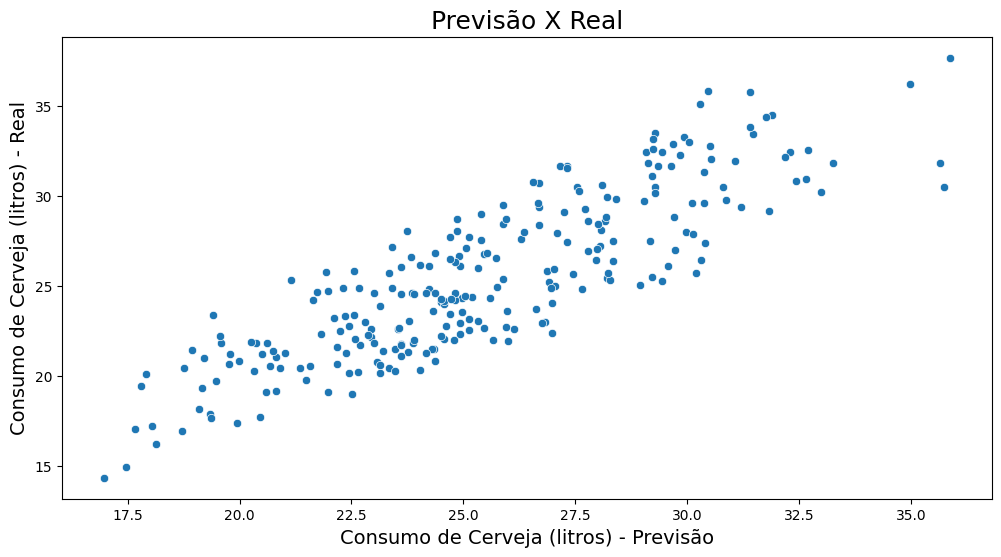

In [177]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

## Obtendo os resíduos


In [178]:
residuo = y_train - y_previsto_train
residuo

195    3.891289
344    4.040500
288   -3.010079
59    -1.704289
220    4.223837
         ...   
73     3.186230
68    -0.739806
215    3.010236
341    2.588394
84     1.631868
Name: Consumo de cerveja (litros), Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos


<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

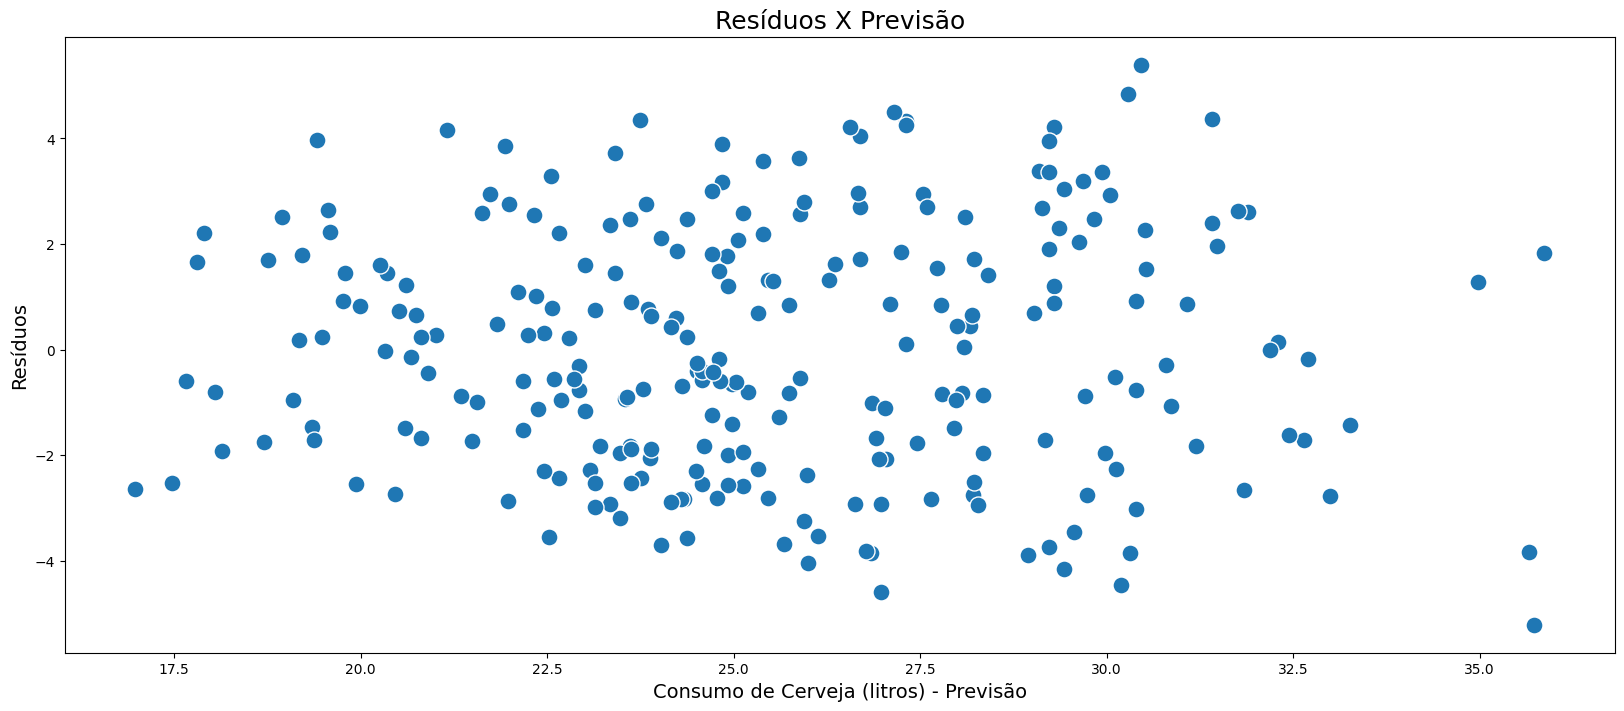

In [179]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Gráfico de dispersão entre valor estimado e resíduos ao quadrado


<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

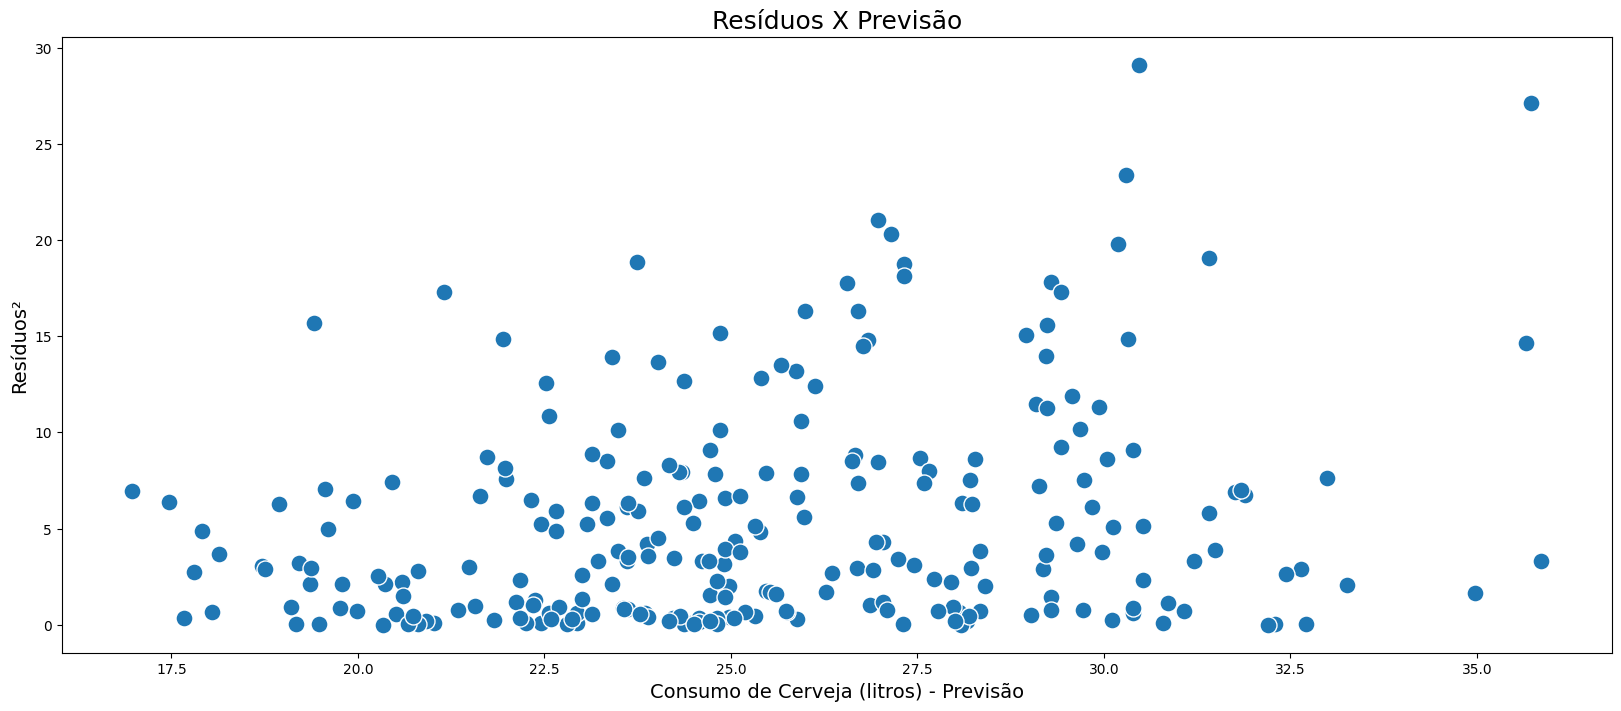

In [180]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## Gráfico da distribuição de frequências dos resíduos


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

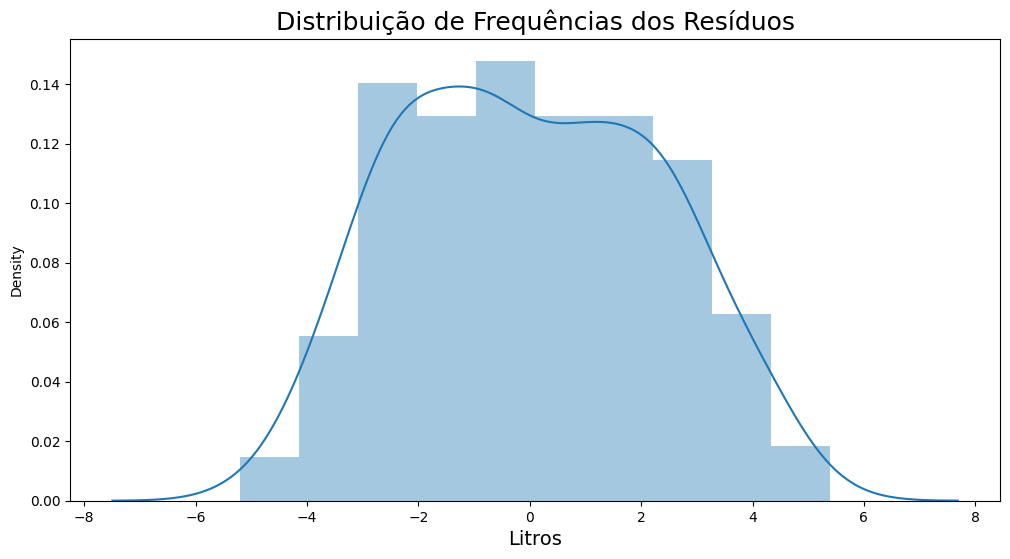

In [181]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparação de Modelos</font>
<hr style='border: 2px solid red;'>

## Criando DataFrames para armazenar as variáveis e Datasets para treinos e testes

In [182]:
X2 = data[['Temperatura Media (C)', 'Precipitacao (mm)', 'Final de Semana']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [183]:
modelo_2 = LinearRegression()


## Estimando modelo linear utilizando os dados de treino (y2_train e X2_train)

In [184]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [185]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train)))
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train)))

Modelo com Temp. Média
R² = 0.6617640611940382
Modelo com Temp. Máxima
R² = 0.7336167014928967


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [191]:
y_previsto = modelo.predict(X_test)
y_previsto2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [187]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto2)))
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto)))


Modelo com Temp. Média
R² = 0.6574588953371101
Modelo com Temp. Máxima
R² = 0.6907364667750691


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Média

In [188]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto2))
R2_2 = metrics.r2_score(y2_test, y_previsto2)

pd.DataFrame([EQM_2 * 10000, REQM_2 * 1000, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,60607.754608
REQM,2461.864225
R²,0.657459


## Obtendo métricas para o modelo com Temperatura Máxima

In [189]:
EQM = metrics.mean_squared_error(y_test, y_previsto)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto))
R2 = metrics.r2_score(y_test, y_previsto)

pd.DataFrame([EQM * 10000, REQM * 1000, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])


,Métricas
EQM,54719.763776
REQM,2339.225594
R²,0.690736


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Obtendo resultados quaisquer utilizando pickle

In [190]:
output = open('Modelo_consumo', 'wb')
pickle.dump(modelo, output)
output.close()